In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\ASUS'

In [3]:
os.chdir('C:/Users/ASUS/Desktop/Data Science/Olympics Data Analysis')

In [4]:
os.getcwd()

'C:\\Users\\ASUS\\Desktop\\Data Science\\Olympics Data Analysis'

In [5]:
os.getcwd()

'C:\\Users\\ASUS\\Desktop\\Data Science\\Olympics Data Analysis'

In [6]:
import pandas as pd
import numpy as np
import statsmodels as sm

In [7]:
events=pd.read_csv('athlete_events.csv')
regions=pd.read_csv('noc_regions.csv')

In [8]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Merging the datasets

In [10]:
events_merged=pd.merge(events,regions,on='NOC',how='left')

In [11]:
events_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [12]:
events_merged.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Data Cleaning

In [13]:
events_merged.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [14]:
#Let's see number of games been played in all these years
events_merged['Sport'].nunique()

66

In [15]:
print(events_merged.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


One thing  is clear that 39783 medals has been won in 66 Sports in 51 editions of Olympics Games,while participating candidates from 1896 to 2016 has been 271116. 

In [16]:
events_merged['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [17]:
events_merged['Medal'].fillna('DNW',inplace=True)

nan means that no medal. Making the visualization better and effective. let's name Participants who didn't win medal into 'DNW' Category

In [18]:
events_merged['Medal'].unique()

array(['DNW', 'Gold', 'Bronze', 'Silver'], dtype=object)

# EDA


Grouping Data into two seasons winter Olympics and Summer Olympics to have better understanding about Olympics participation into different seasons
let's explore data more. Firstly, let's see events participation by Gender

In [19]:
events_merged['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

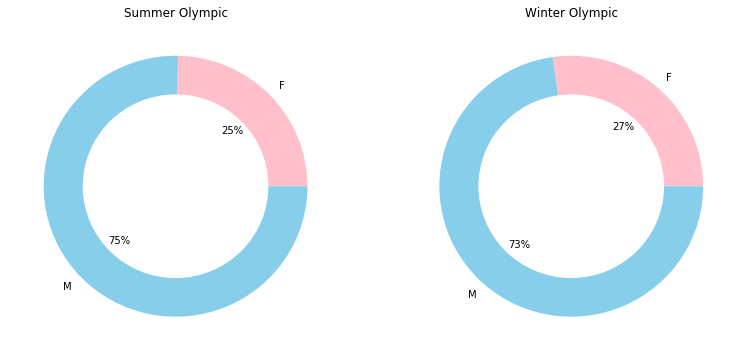

In [20]:
winter=events_merged[events_merged['Season']=='Winter']
summer=events_merged[events_merged['Season']=='Summer']

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
summer.groupby('Sex')['ID'].nunique().plot.pie(autopct='%1.0f%%',colors=['pink','skyblue'])
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title('Summer Olympic')

plt.subplot(1,2,2)
winter.groupby('Sex')['ID'].nunique().plot.pie(autopct='%1.0f%%',colors=['pink','skyblue'])
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title('Winter Olympic')
plt.show()

Female Participation is more in Winter Olympics than Summer Olympics. On the other hand, %age of Female participation is significant here as Females have increased significantly,as they were not allowed to participate in Olympics before 1900. Following increase in Women Participation shows increasing number of participants every Olympic Year`

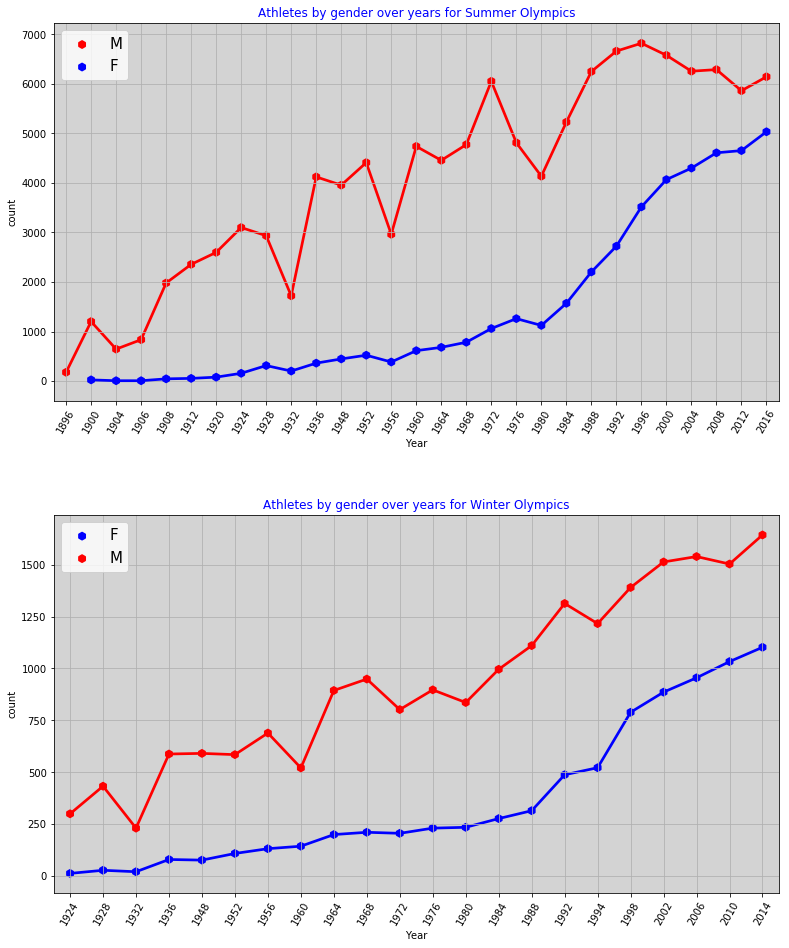

In [21]:
sum_gc=summer.groupby(['Year','Sex'])['ID'].nunique().reset_index()
win_gc=winter.groupby(['Year','Sex'])['ID'].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = sum_gc["Year"] , y = sum_gc["ID"],
                   markers="h" , hue = sum_gc["Sex"],palette = ["r","b"])
plt.grid(True)
plt.xticks(rotation = 60)
ax.set_facecolor("lightgrey")
plt.ylabel("count")
plt.title("Athletes by gender over years for Summer Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})

plt.subplot(212)
ax1 = sns.pointplot(x = win_gc["Year"] , y = win_gc["ID"],
                    markers="h",palette = ["b","r"],
                   hue = win_gc["Sex"])
plt.xticks(rotation = 60)
ax1.set_facecolor("lightgrey")
plt.grid(True)
plt.ylabel("count")
plt.title("Athletes by gender over years for Winter Olympics",color="b")
plt.legend(loc = "best" ,prop={"size":15})
plt.subplots_adjust(hspace = .3)
plt.show()

3.  It is visible from above graphs that, Female Participation in Winter Olympics began in 1924, while they are allowed in Summer Olympic from 1990 and their numbers are increasing every year. 
4. Number of Sports with Participation level also increased.

Text(0.5,1,'Sex wise Sports events over years for Winter Olympics')

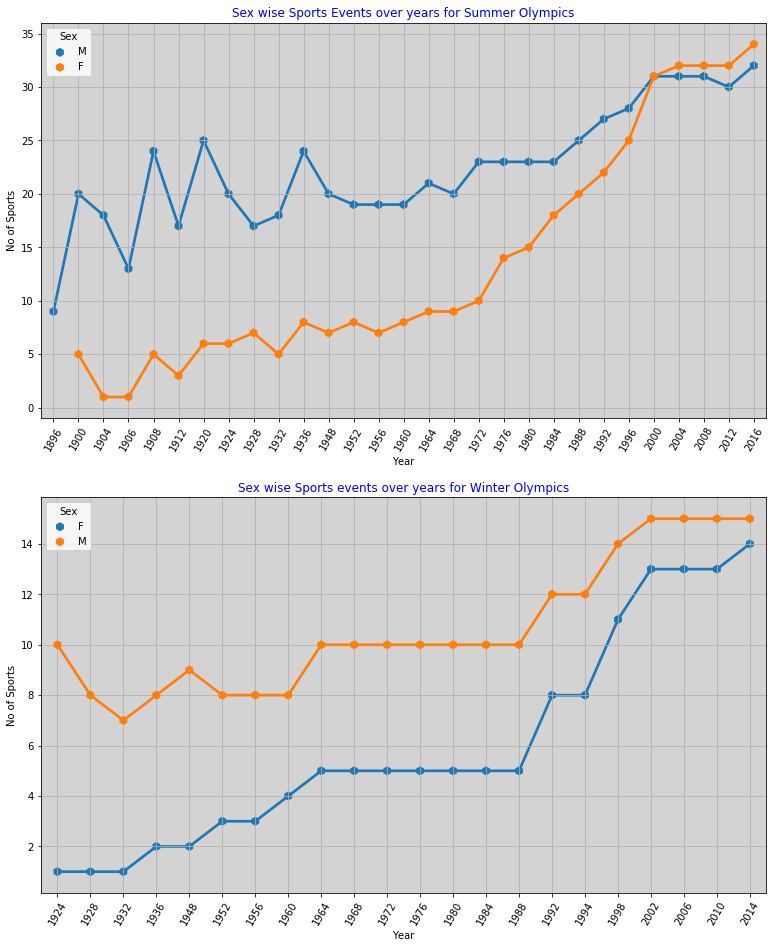

In [22]:
sum_F=summer[summer['Sex']=='F']
win_F=winter[winter['Sex']=='F']

sum_sport=summer.groupby(['Year','Sex'])['Sport'].nunique().reset_index()
win_sport=winter.groupby(['Year','Sex'])['Sport'].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax2=sns.pointplot(sum_sport['Year'],sum_sport['Sport'],hue=sum_sport['Sex'],markers='h')
plt.grid(True)
plt.xticks(rotation=60)
ax2.set_facecolor("lightgrey")
plt.ylabel('No of Sports')
plt.title("Sex wise Sports Events over years for Summer Olympics",color="b")


plt.subplot(212)
ax3=sns.pointplot(win_sport['Year'],win_sport['Sport'],hue=win_sport['Sex'],markers='h')
plt.grid(True)
plt.xticks(rotation=60)
ax3.set_facecolor("lightgrey")
plt.ylabel('No of Sports')
plt.title("Sex wise Sports events over years for Winter Olympics",color="b")


Hence, Number of Sports Events in Summer Olympics increased from 5 in 1900 to 34 in 2016,while number of Sports Events in Winter Olympics increased from 1 in 1924 to 14 in 2014

# Athlete Participation in Games

Text(0.5,1,'No. of Participants in Winter Olympics')

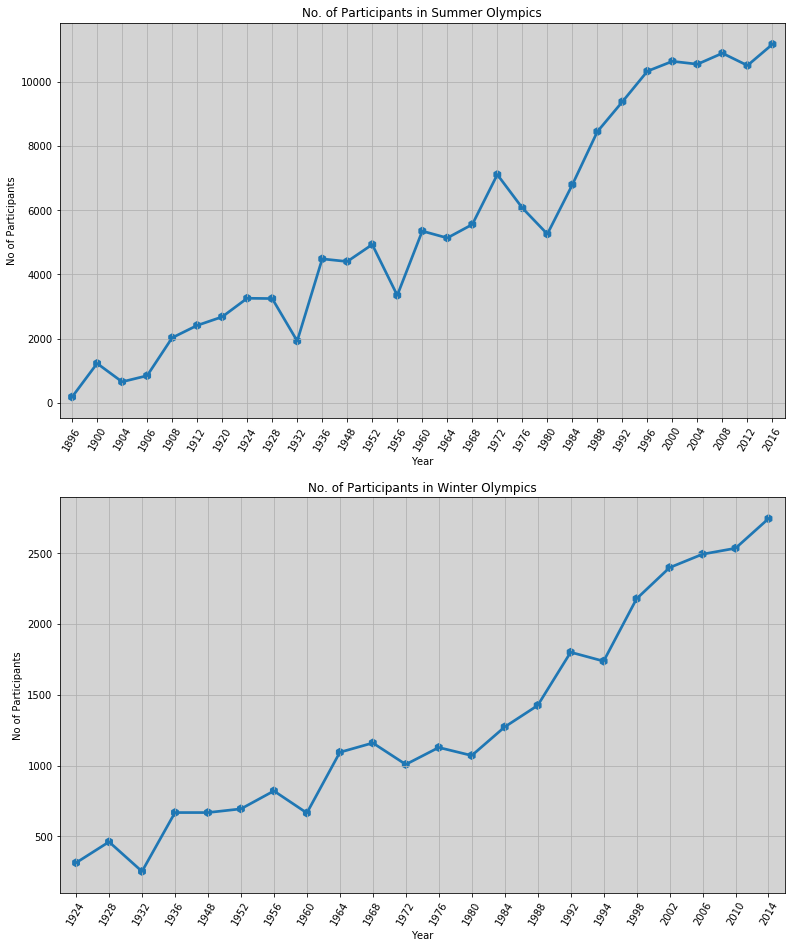

In [23]:
summer_participants=summer.groupby('Year')['ID'].nunique().reset_index()
winter_participants=winter.groupby('Year')['ID'].nunique().reset_index()
fig=plt.figure(figsize=(13,16))
plt.subplot(2,1,1)
ax1=sns.pointplot(summer_participants['Year'],summer_participants['ID'],markers='h')
plt.grid(True)
plt.xticks(rotation=60)
ax1.set_facecolor("lightgrey")
plt.ylabel('No of Participants')
plt.title('No. of Participants in Summer Olympics')

plt.subplot(2,1,2)
ax2=sns.pointplot(winter_participants['Year'],winter_participants['ID'],markers='h')
plt.grid(True)
plt.xticks(rotation=60)
ax2.set_facecolor("lightgrey")
plt.ylabel('No of Participants')
plt.title('No. of Participants in Winter Olympics')

No of Athletes in Each Version of Olympics has increased over the years. However there was significant drop is No of Athletes in 1932,1956,1980 in Summer Olympics:
1. There was sudden drop in 1932 participation due to impact of Great Economic Depression.
2. Decrease in Number of participants in 1956 as compared to 1952 Olympics is due to non participation of Egypt,Iraq and Lebanon in response to Suez Crisis . Netherland, Combodia, Spain and Switzerland boycotted the event in protest against Soviet Union. People Republic of China didn't participate because Republic of China was participating.
3. Major boycott since 1956 on call of US against Soviet Union due to Afghan War resulted in significant drop of participation.

The reason of drop in winter olympics participatuon is same period is also due to same reasons

It is thus very much evident that Geopolitical Situations is the major reason to impact the Particpation in Games 

# Countries Participation in Olympics


Text(0.5,1,'Participating Countries in Winter Olympics')

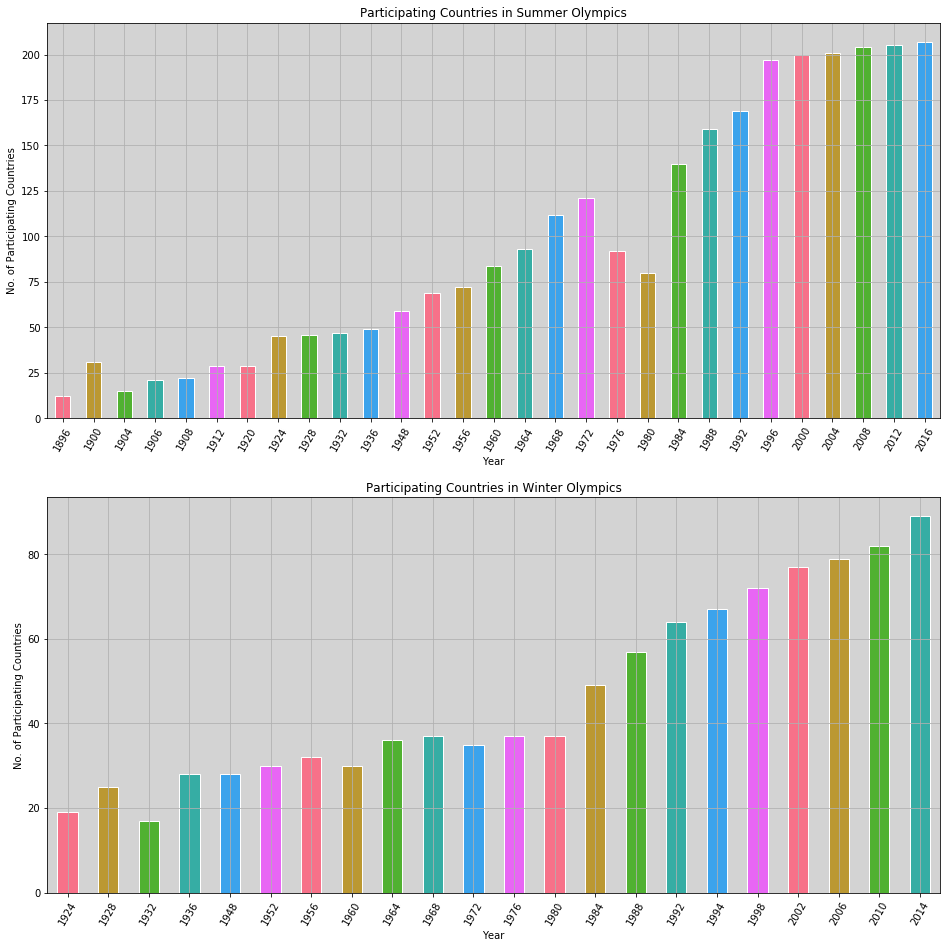

In [24]:
sum_country=summer.groupby('Year')['NOC'].nunique()
win_country=winter.groupby('Year')['NOC'].nunique()
fig=plt.figure(figsize=(16,16))

plt.subplot(2,1,1)
ax1=sum_country.plot(kind='bar',color=sns.color_palette('husl'),linewidth=1,edgecolor=  "w"*summer["Year"].nunique())
plt.xticks(rotation=60)
ax1.set_facecolor('lightgrey')
plt.grid(True)
plt.ylabel('No. of Participating Countries')
plt.title('Participating Countries in Summer Olympics')

plt.subplot(212)
ax2=win_country.plot(kind='bar',color=sns.color_palette('husl'),linewidth=1,edgecolor=  "w"*winter["Year"].nunique())
plt.xticks(rotation=60)
ax2.set_facecolor('lightgrey')
plt.grid(True)
plt.ylabel('No. of Participating Countries')
plt.title('Participating Countries in Winter Olympics')

Number of Participating Countries in Olympics Games increased Year by Year.

# Medal Tally of Countries

In [25]:
events_merged.Medal.unique()

array(['DNW', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [26]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands,NaN


In [27]:
summer_gold=summer[summer['Medal']=='Gold']
summer_silver=summer[summer['Medal']=='Silver']
summer_bronze=summer[summer['Medal']=='Bronze']
summer_gold.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


                          index  Medal
0                           USA   2472
1                        Russia   1220
2                       Germany   1075
3                            UK    636
4                         Italy    518
5                        France    465
6                       Hungary    432
7                     Australia    362
8                        Sweden    354
9                         China    335
10                  Netherlands    245
11                        Japan    230
12                       Norway    227
13                      Denmark    179
14                  South Korea    171
15                         Cuba    164
16                      Romania    161
17                       Canada    158
18                       Serbia    157
19                      Finland    132
20                        India    131
21                       Poland    111
22                        Spain    109
23                       Brazil    109
24                  Switz

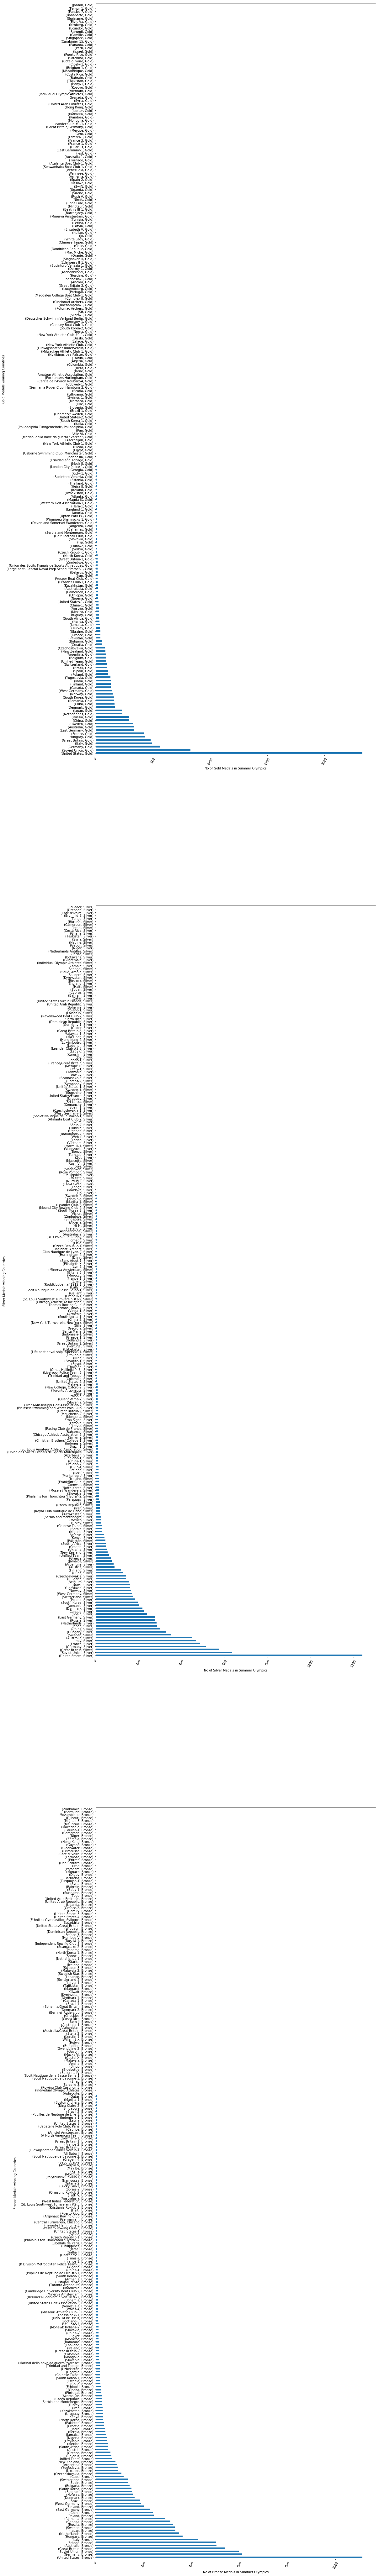

In [28]:
print(summer_gold.region.value_counts().reset_index(name='Medal'))
fig=plt.figure(figsize=(16,150))
plt.subplot(311)
summer_gold.groupby('Team')['Medal'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xticks(rotation=60)
plt.xlabel('No of Gold Medals in Summer Olympics')
plt.ylabel('Gold Medals winning Countries')

plt.subplot(312)
summer_silver.groupby('Team')['Medal'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xticks(rotation=60)
plt.xlabel('No of Silver Medals in Summer Olympics')
plt.ylabel('Silver Medals winning Countries')

plt.subplot(313)
summer_bronze.groupby('Team')['Medal'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xticks(rotation=60)
plt.xlabel('No of Bronze Medals in Summer Olympics')
plt.ylabel('Bronze Medals winning Countries')


plt.show()

Plots clearly states that USA has been most successful Medal winning Country in Summer Olympics,with highest Medal Tally in Gold,Silver and Bronze Medals in all these years followed by Soviet Union


In [29]:
summer.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [30]:
winter.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region    False
notes      True
dtype: bool

Let's understand Medal Tally Distribution according to Gender and Age

Sex  Medal 
F    Bronze    3174
     Gold      3140
     Silver    3128
M    Gold      8319
     Bronze    8235
     Silver    8092
Name: Medal, dtype: int64


Text(0.5,1,'Gender wise medal distribution in Summer Olympics')

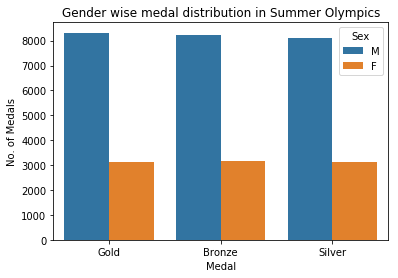

In [31]:
summer_medal=summer[summer['Medal']!='DNW']
print(summer_medal.groupby('Sex')['Medal'].value_counts())
sns.countplot(x='Medal',hue='Sex',data=summer_medal)
plt.xlabel('Medal')
plt.ylabel('No. of Medals')
plt.title('Gender wise medal distribution in Summer Olympics')


Sex  Medal 
F    Gold       607
     Silver     607
     Bronze     597
M    Gold      1306
     Bronze    1289
     Silver    1289
Name: Medal, dtype: int64


Text(0.5,1,'Gender wise medal distribution in Winter Olympics')

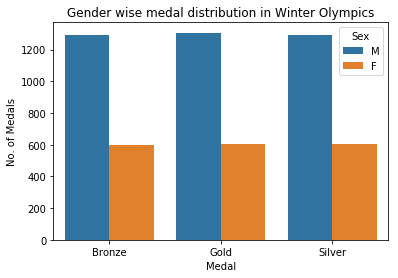

In [32]:
winter_medal=winter[winter['Medal']!='DNW']
print(winter_medal.groupby('Sex')['Medal'].value_counts())
sns.countplot(x='Medal',hue='Sex',data=winter_medal)
plt.xlabel('Medal')
plt.ylabel('No. of Medals')
plt.title('Gender wise medal distribution in Winter Olympics')

Males have an advantage of Winning more medals. It may be due to more Sports events open for Males as compared to females in initial years.

Since, Age Column has many null values,let's explore data with non null Age values

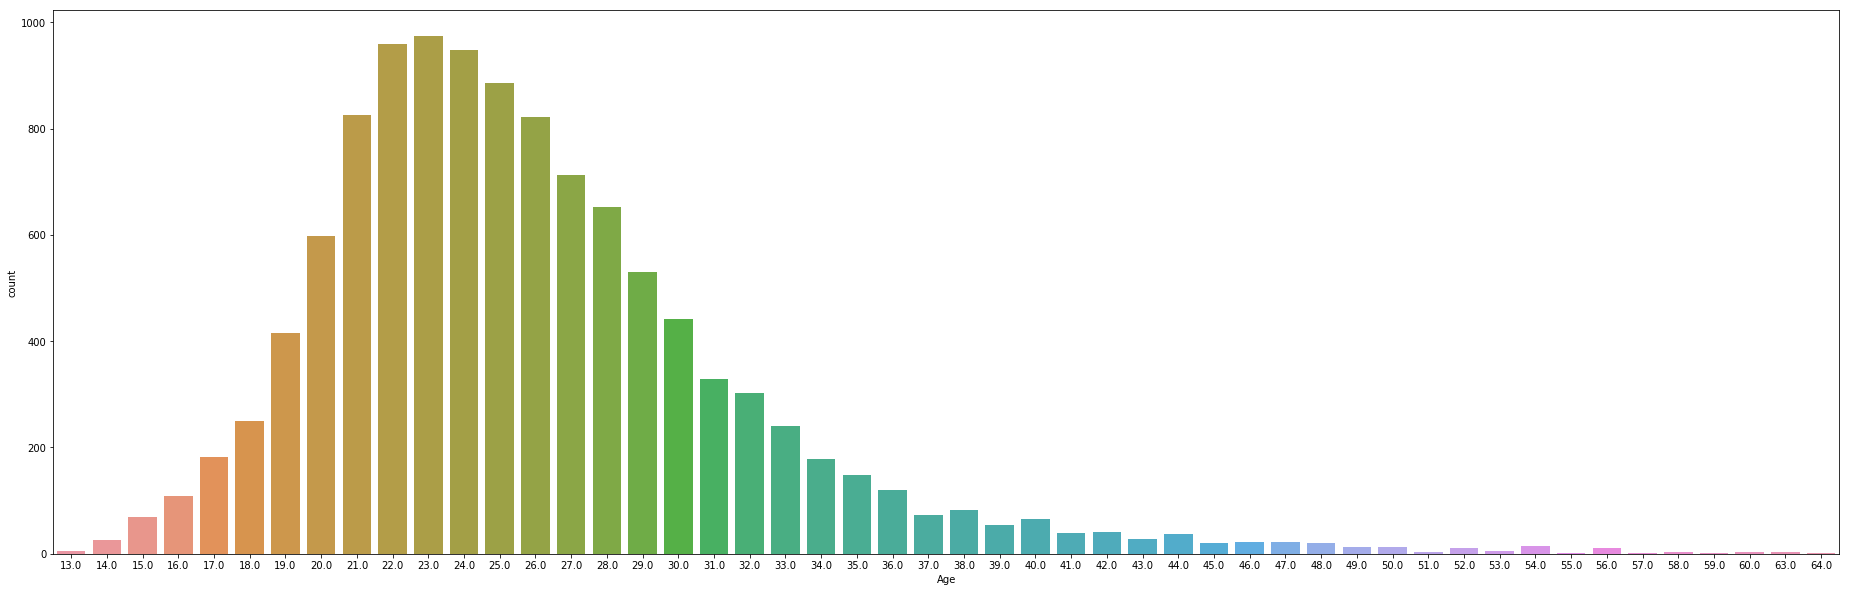

In [33]:
summer_gold=summer[summer['Medal']=='Gold']
summer_silver=summer[summer['Medal']=='Silver']
summer_bronze=summer[summer['Medal']=='Bronze']
gold_age_finite=summer_gold[np.isfinite(summer_gold['Age'])]
silver_age_finite=summer_silver[np.isfinite(summer_silver['Age'])]
bronze_age_finite=summer_bronze[np.isfinite(summer_bronze['Age'])]

fig=plt.figure(figsize=(32,10))
sns.countplot(gold_age_finite['Age'])

In [34]:
print('Mean Age of Winning Gold Medals is {}'.format(gold_age_finite['Age'].mean()))


Mean Age of Winning Gold Medals is 25.857950530035335


Some Outliers are observed as many Gold Medals are Won above age 0f 50. Let's see the sports where people at Old Age won Medals

In [35]:
old_age=gold_age_finite['ID'][gold_age_finite['Age']>=50].count()
print('{} athletes above age of 50 won Gold medals in Summer Olympics'.format(old_age))

74 athletes above age of 50 won Gold medals in Summer Olympics


Woah! 74 people at age of 50 and above are there who secured Gold Medal in Summer Olympics. 
It would be interesting to see the sports in which these people secured the medals.

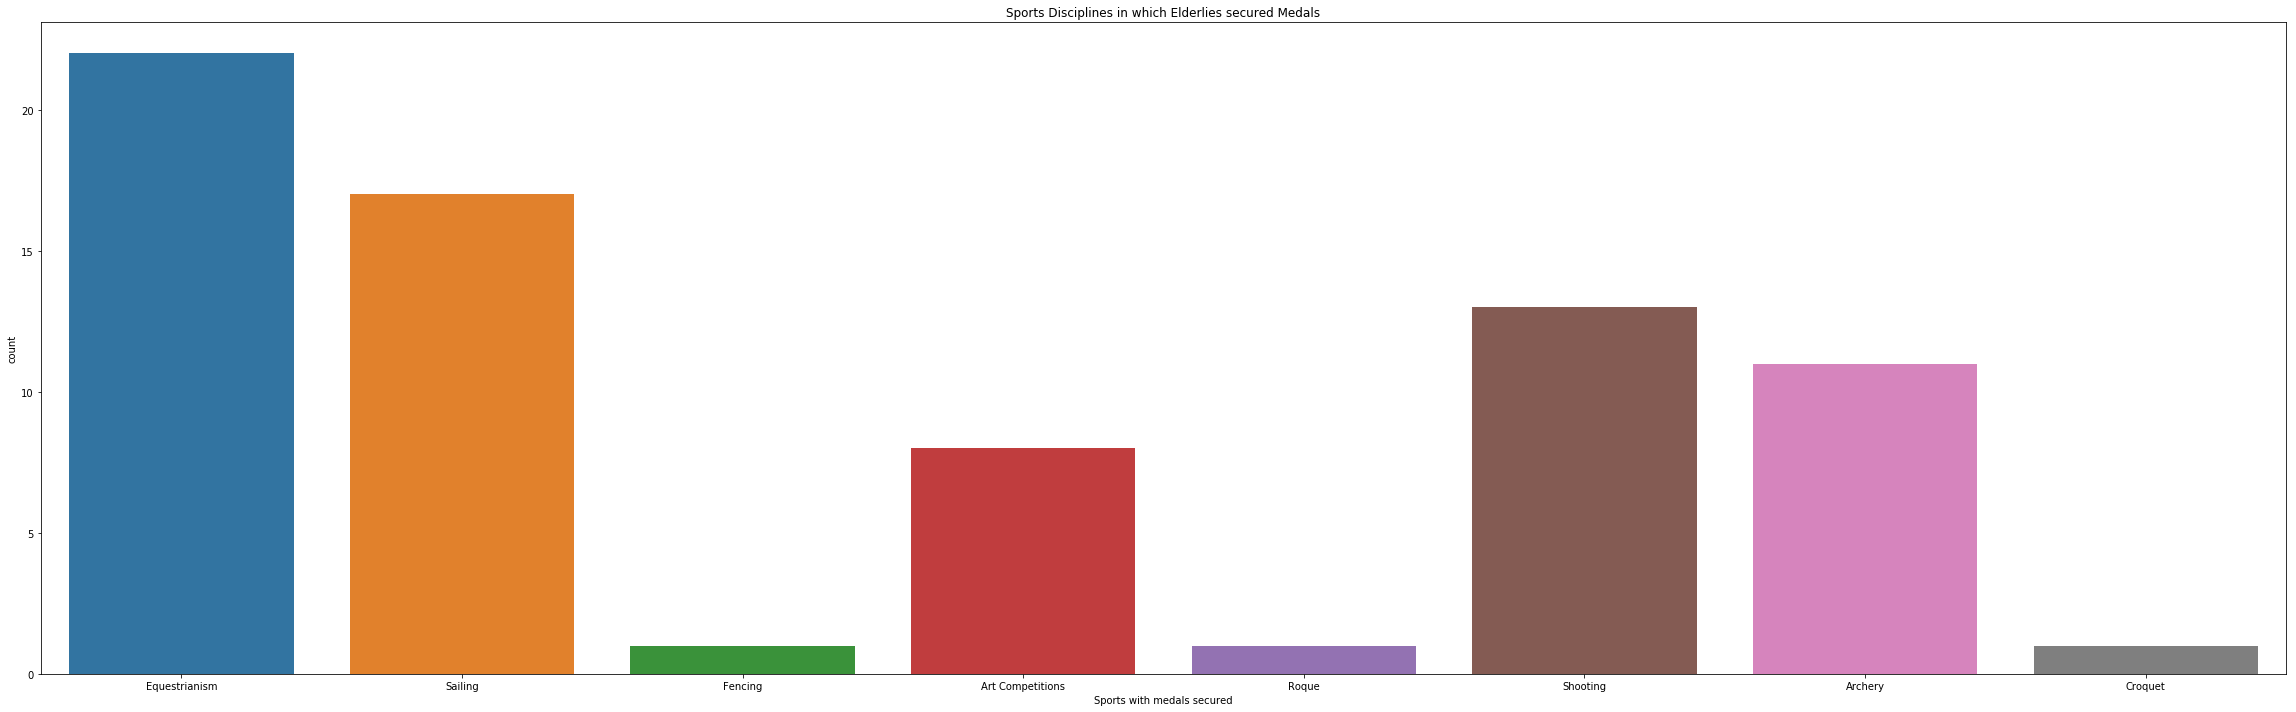

In [36]:
old_sports=gold_age_finite[gold_age_finite['Age']>=50]['Sport']

fig=plt.figure(figsize=(32,10))
sns.countplot(old_sports)
plt.xlabel('Sports with medals secured')
plt.title('Sports Disciplines in which Elderlies secured Medals')
plt.tight_layout()

In [37]:
gold_age_finite.describe()

,ID,Age,Height,Weight,Year
count,11320.000000,11320.000000,8855.000000,8617.000000,11320.000000
mean,69147.416696,25.857951,178.297685,74.354358,1971.691166
std,38980.998986,6.044506,11.357982,15.519435,34.648361
min,4.000000,13.000000,136.000000,28.000000,1896.000000
25%,35690.500000,22.000000,170.000000,63.000000,1948.000000
50%,69149.000000,25.000000,178.000000,73.000000,1980.000000
75%,103260.750000,29.000000,186.000000,84.000000,2000.000000
max,135553.000000,64.000000,223.000000,170.000000,2016.000000


Maximum Age of Athlete who won Gold medal at Summer Olympics is 64. Following are the sports in which athletes at this age won Gold Medals

In [38]:
gold_age_finite[gold_age_finite['Age']==64]['Sport']

105199       Roque
233390    Shooting
Name: Sport, dtype: object

Well, Sports in which people above age of 50 secured medals are Equestrianism, Sailing, Fencing, Art Competitions, Roque, Shooting, Archery, Croquet. All these events does require Expertise and Experience.
Maximum Age of person winning gold medals are 64 and they won it in Roque and Shooting.

Let's see now Young Athletes who won Gold Medals

No of SPorts in which Athletes under age of 18 won Gold medals are 23
Total Number of Young Athletes with Gold Medals ; 394
Sports wise No. of Young athletes with Gold Medals : Swimming               202
Gymnastics              83
Diving                  26
Rowing                  17
Rhythmic Gymnastics     15
Athletics               10
Archery                  6
Boxing                   5
Fencing                  5
Football                 3
Shooting                 3
Golf                     3
Cycling                  2
Water Polo               2
Judo                     2
Croquet                  2
Sailing                  2
Handball                 1
Weightlifting            1
Tennis                   1
Canoeing                 1
Taekwondo                1
Volleyball               1
Name: Sport, dtype: int64


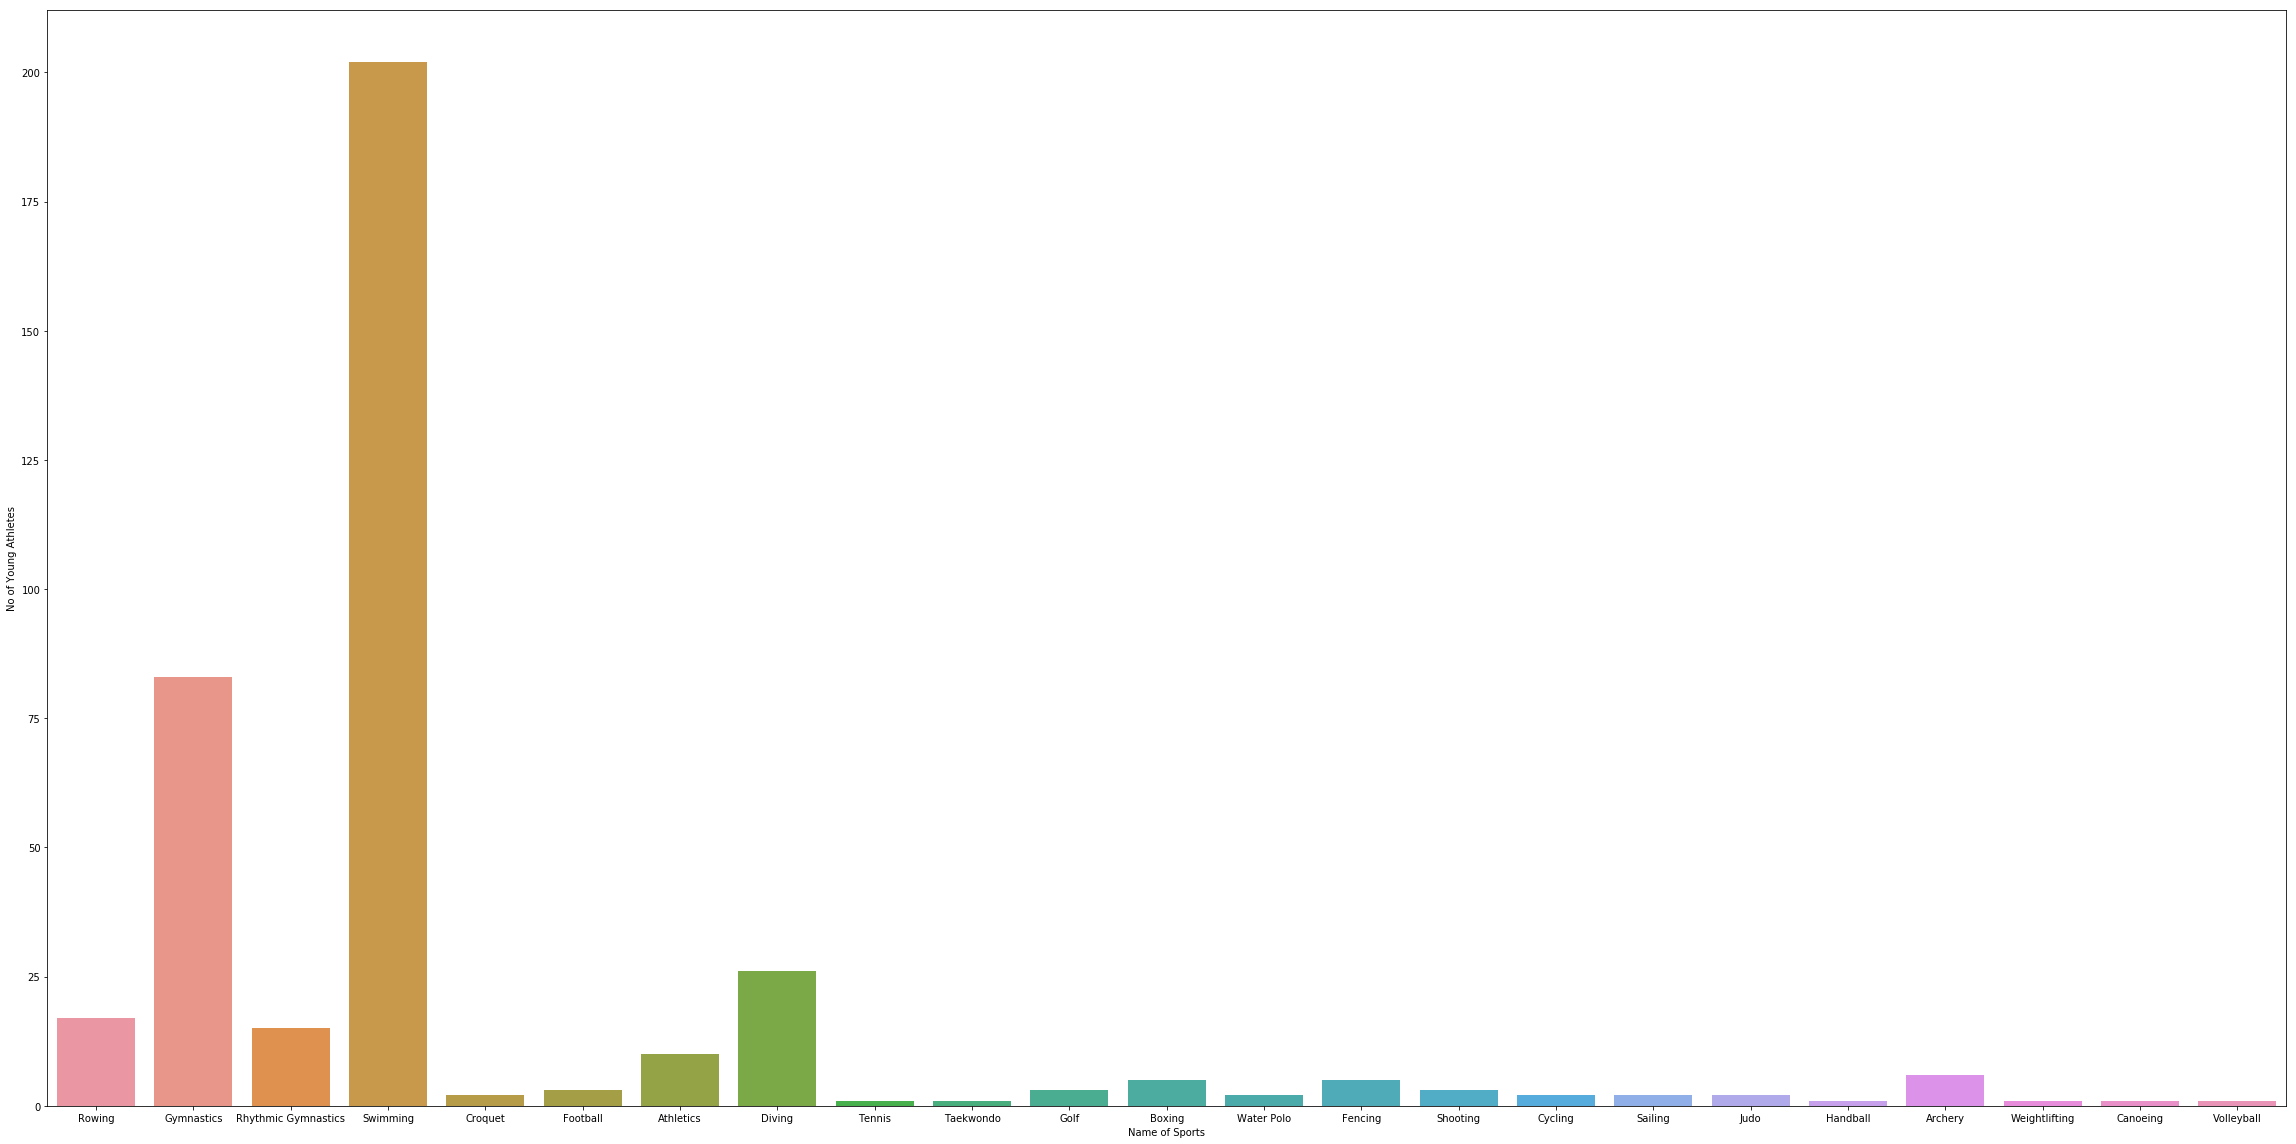

In [39]:
young_sports=gold_age_finite[gold_age_finite['Age']<18]['Sport']
print('No of SPorts in which Athletes under age of 18 won Gold medals are {}'.format(young_sports.nunique()))
figure=plt.figure(figsize=(32,16))
sns.countplot(young_sports)
plt.xlabel('Name of Sports')
plt.ylabel('No of Young Athletes')
plt.tight_layout()
print('Total Number of Young Athletes with Gold Medals ; {}'.format(gold_age_finite['ID'][gold_age_finite['Age']<18].count()))
print('Sports wise No. of Young athletes with Gold Medals : {}'.format(young_sports.value_counts()))

Thus,394 Young Athletes won Gold Medals in Olympics in 23 Sports with maximum number of Gold medals in Swimming.

# Discipline wise Analysis of Performance

Now we have seen athlete participation, age factor on Medals and female participation. Let us now dig into different sports medal tally. And Let's keep focus on top 5 Gold Winning Nations and USA(Country with maximum Gold Medals in Summer Olympics)

In [52]:
summer_gold.region.value_counts().reset_index(name='Medal').head(5)

summer_gold['NOC'].replace(['URS','EUS'],'RUS')
summer_gold['NOC'].replace(['GDR','FRG'],'GER')
top_countries=['USA','RUS','GER','GBR','ITA']
for x in top_countries:
    gold_x=summer_gold.loc[summer_gold['NOC']==x]
    print('Medal Count of Country',summer_gold[summer_gold['NOC']==x]['region'].unique(),'\n',gold_x.Event.value_counts().reset_index(name='Medal').head(20))
    


Medal Count of Country ['USA'] 
                                               index  Medal
0                       Basketball Men's Basketball    186
1     Swimming Men's 4 x 200 metres Freestyle Relay    111
2                         Rowing Men's Coxed Eights    108
3        Swimming Men's 4 x 100 metres Medley Relay    108
4                     Basketball Women's Basketball     95
5              Athletics Men's 4 x 400 metres Relay     81
6      Swimming Women's 4 x 100 metres Medley Relay     79
7   Swimming Women's 4 x 100 metres Freestyle Relay     78
8                         Football Women's Football     66
9              Athletics Men's 4 x 100 metres Relay     63
10    Swimming Men's 4 x 100 metres Freestyle Relay     58
11           Athletics Women's 4 x 100 metres Relay     50
12                        Softball Women's Softball     45
13           Athletics Women's 4 x 400 metres Relay     38
14                      Volleyball Men's Volleyball     36
15                     

In [53]:
gold_USA=summer_gold.loc[summer_gold['NOC']=='USA']
print('Gold Medal Tally for USA until 2016 is','\n',gold_USA.Event.value_counts().reset_index(name='Medal'))
print('Gold Medal Count of USA:',gold_USA[gold_USA['Medal']=='Gold']['Medal'].value_counts())

Gold Medal Tally for USA until 2016 is 
                                                  index  Medal
0                          Basketball Men's Basketball    186
1        Swimming Men's 4 x 200 metres Freestyle Relay    111
2                            Rowing Men's Coxed Eights    108
3           Swimming Men's 4 x 100 metres Medley Relay    108
4                        Basketball Women's Basketball     95
5                 Athletics Men's 4 x 400 metres Relay     81
6         Swimming Women's 4 x 100 metres Medley Relay     79
7      Swimming Women's 4 x 100 metres Freestyle Relay     78
8                            Football Women's Football     66
9                 Athletics Men's 4 x 100 metres Relay     63
10       Swimming Men's 4 x 100 metres Freestyle Relay     58
11              Athletics Women's 4 x 100 metres Relay     50
12                           Softball Women's Softball     45
13              Athletics Women's 4 x 400 metres Relay     38
14                         Vo

USA has good medal tally, but there is an issue. in 51 Olympics organized till date, Team Sports like Basketball has 281 medals,which is increasing overall medal count of USA Gold medal tally. In Team event, if a team has won a medal, its count in medal table is 1 while medals are distributed to all team members. Thus this increased count of medal in team sports is sum of all distributed medals. We need to work on that and remove aberration.

In [42]:
#Create a new column 'Medal Won' such that it contains value that if medal is won,it is has value won as 1 or 0 if not won else DNW
events_merged['Medal_Won'] = np.where(events_merged.loc[:,'Medal'] == 'DNW', 0, 1)
identify_events=pd.pivot_table(events_merged,index=['Team','Year','Event'],columns='Medal',values='Medal_Won',fill_value=0,aggfunc='sum').drop('DNW',axis=1).reset_index()
identify_events=identify_events.loc[identify_events['Gold']>1]
identify_team=identify_events['Event'].unique()

Gymnastic's Women's Balance Beam, Gymnastics Men's Horizontal Bar, Swimming Women' 100m Freestyle, swimming Men's 50m Freestyle are individual events but are given multiple medals in same event is due to other reasons.

In [43]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]
identify_team=list(set(identify_team)-set(remove_sports))

In [44]:
# The next thing we need to do is add a column in the dataset that correctly identifies whether the event in the given record is a team event or a single event. We then use this column to correctly calculate the medal tally for each country.
team_event_mask = events_merged['Event'].map(lambda x: x in identify_team)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = events_merged['Medal_Won'] == 1

# Put 1 under team event if medal is won and event in team event list
events_merged['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
events_merged['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
events_merged['Event_Category'] = events_merged['Single_Event'] + \
events_merged['Team_Event']
events_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Medal_Won,Team_Event,Single_Event,Event_Category
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,DNW,China,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1,1,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,0,0,0,0


In [46]:
medal_tally_agnostic = events_merged.\
groupby(['Year', 'Team', 'Event', 'Medal','Season','region'])[['Medal_Won', 'Event_Category']].\
agg('sum').reset_index()

medal_tally_agnostic['Medal_Won_Corrected'] = medal_tally_agnostic['Medal_Won']/medal_tally_agnostic['Event_Category']

In [47]:
medal_tally = medal_tally_agnostic[medal_tally_agnostic['Season']=='Summer'].groupby(['Year','Team','Event','region'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(medal_tally,
                     index = 'region',
                     columns = ['Year','Event'],
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:6]

# print total medals won in the given period
medal_tally_pivot.loc[:,'All']

region
USA        2545.0
Russia     1577.0
Germany    1392.0
UK          895.0
France      777.0
Name: All, dtype: float64

In [48]:
USA_gold=medal_tally_agnostic[medal_tally_agnostic['region']=='USA']
USA_gold=USA_gold[USA_gold['Medal']=='Gold']
print('Corrected Gold Medal Tally of USA :',USA_gold['Medal_Won_Corrected'].agg('sum'))

Corrected Gold Medal Tally of USA : 1131.0


In [55]:
print("Gold Medal in Men's Basketball after correction",USA_gold[USA_gold['Event']=="Basketball Men's Basketball"]['Medal'].value_counts())

Gold Medal in Men's Basketball after correction Gold    15
Name: Medal, dtype: int64


Thus USA men team won Gold in Basketball 15 times.

 And USA Gold Medal Tally has also been reduced to 2472 to 1131 after Medal Correction

Let's see medal wise tally of countries in Olympic Years

Text(0,0.5,'Country')

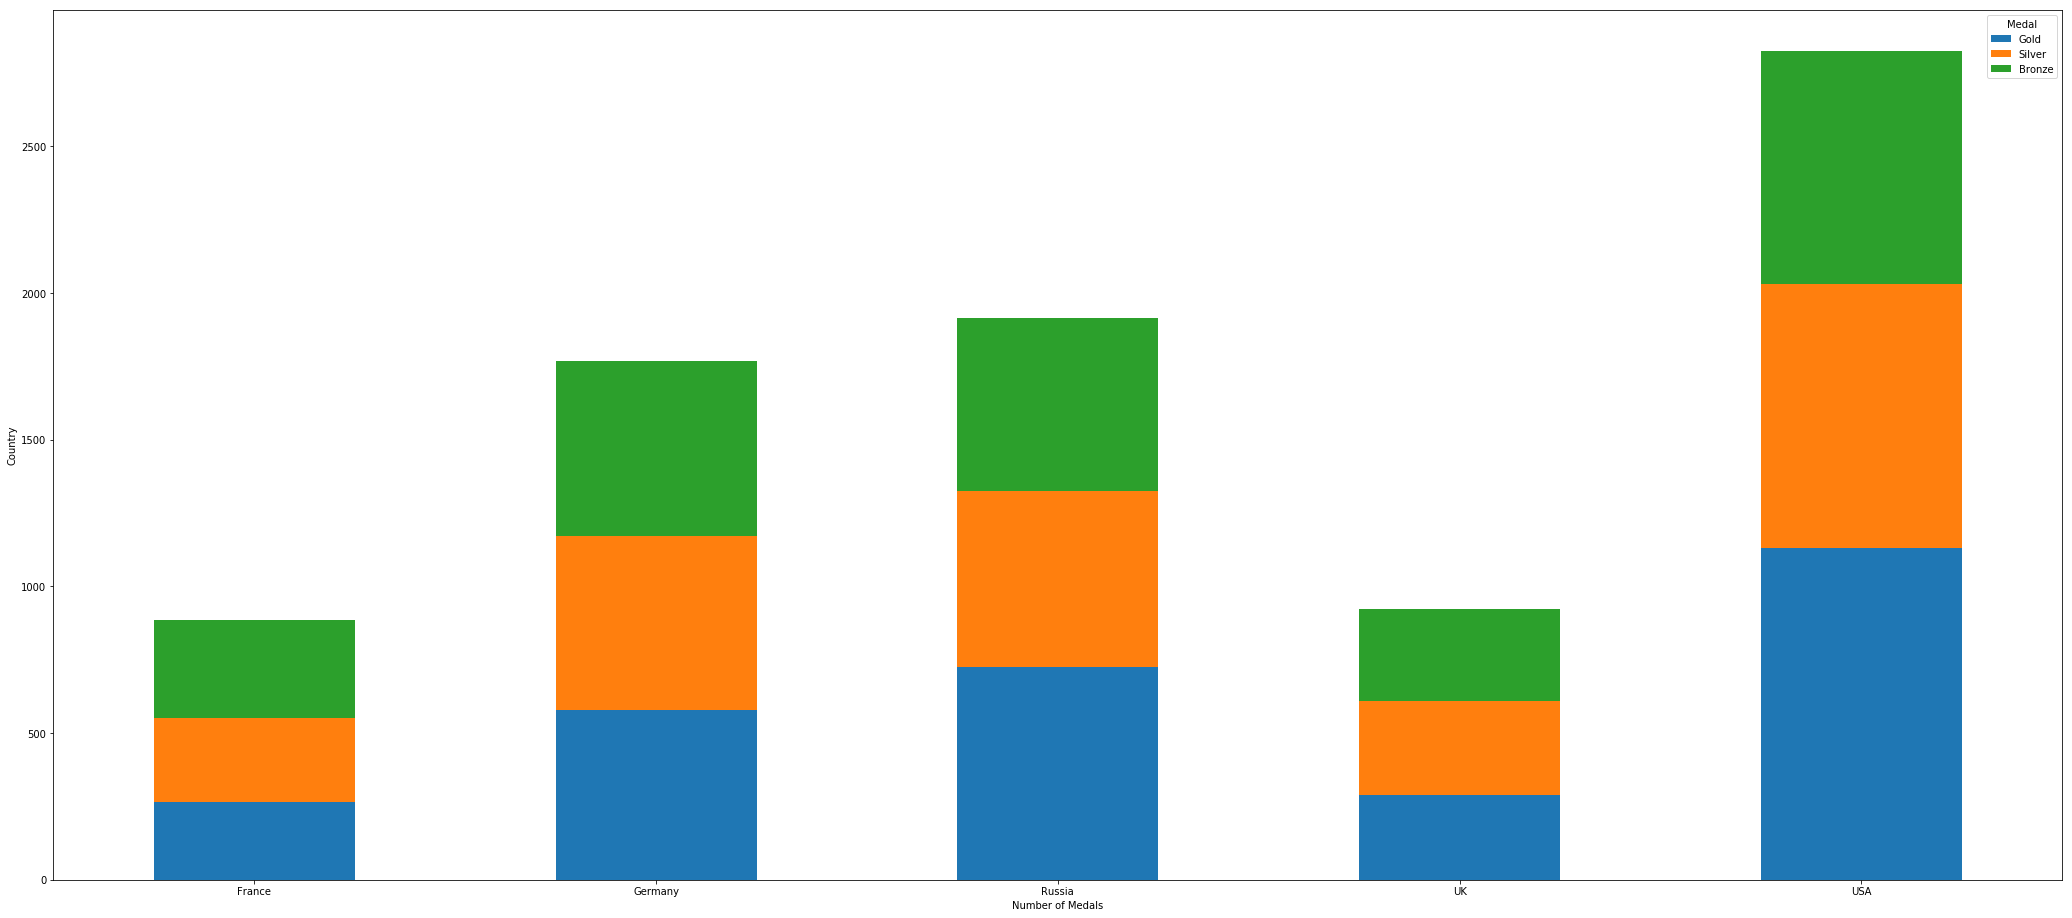

In [56]:
top_countries = ['UK','USA', 'Russia', 'Germany', 'France']

# row mask where countries match
row_mask_2 = medal_tally_agnostic['region'].map(lambda x: x in top_countries)

# Pivot table to calculate sum of gold, silver and bronze medals for each country
medal_tally_specific = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                     index = ['region'],
                                     columns = 'Medal',
                                     values = 'Medal_Won_Corrected',
                                     aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1)

# Re-order the columns so that they appear in order on the chart.
medal_tally_specific = medal_tally_specific.loc[:, ['Gold', 'Silver', 'Bronze']]

medal_tally_specific.plot(kind = 'bar', stacked = True, figsize = (36,16), rot = 0)
plt.xlabel('Number of Medals')
plt.ylabel('Country')

Let's see what sport each country performed the best

In [57]:
best_team_sports = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                  index = ['region', 'Event'],
                                  columns = 'Medal',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['region', 'Gold'], ascending = [True, False]).reset_index()

best_team_sports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)
best_team_sports.columns = ['Team', 'Event', 'Gold_Medal_Count']

best_team_sports.groupby('Team').head(5)

,Team,Event,Gold_Medal_Count
0,France,"Fencing Men's Foil, Individual",10
1,France,"Fencing Men's epee, Team",10
2,France,Cycling Men's Sprint,7
3,France,"Fencing Men's Foil, Team",7
4,France,"Fencing Men's epee, Individual",6
622,Germany,"Equestrianism Mixed Dressage, Team",13
623,Germany,Luge Men's Singles,10
624,Germany,Luge Mixed (Men)'s Doubles,10
625,Germany,Luge Women's Singles,10
626,Germany,Bobsleigh Men's Four,8


1. France earned maximum Gold Medals in Fencing ,
2. Germany in Equestrianism, 
3. Russia in Figure Skating, 
4. UK in Rowing, and 
5. USA in Athletics

In [58]:
row_mask_3 = events_merged['region'].map(lambda x: x in top_countries)

year_team_gender = events_merged.loc[row_mask_3, ['Year', 'Name', 'Sex','region']].drop_duplicates()

In [59]:
# Create a pivot table to count gender wise representation of each team in each year
year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['Year', 'region'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()

# rename columns as per column names in the 0th level
year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)

# rename the columns appropriately
year_team_gender_count.columns = ['Year', 'region', 'Female_Athletes', 'Male_Athletes']

# get total athletes per team-year
year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + \
year_team_gender_count['Male_Athletes']

In [60]:
uk_data = year_team_gender_count[year_team_gender_count['region'] == "UK"]
uk_data.fillna(0, inplace = True)
uk_data.set_index('Year', inplace = True)

ger_data = year_team_gender_count[year_team_gender_count['region'] == "Germany"]
ger_data.set_index('Year', inplace = True)

rus_data = year_team_gender_count[year_team_gender_count['region'] == "Russia"]
rus_data.set_index('Year', inplace = True)

usa_data = year_team_gender_count[year_team_gender_count['region'] == "USA"]
usa_data.set_index('Year', inplace = True)


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


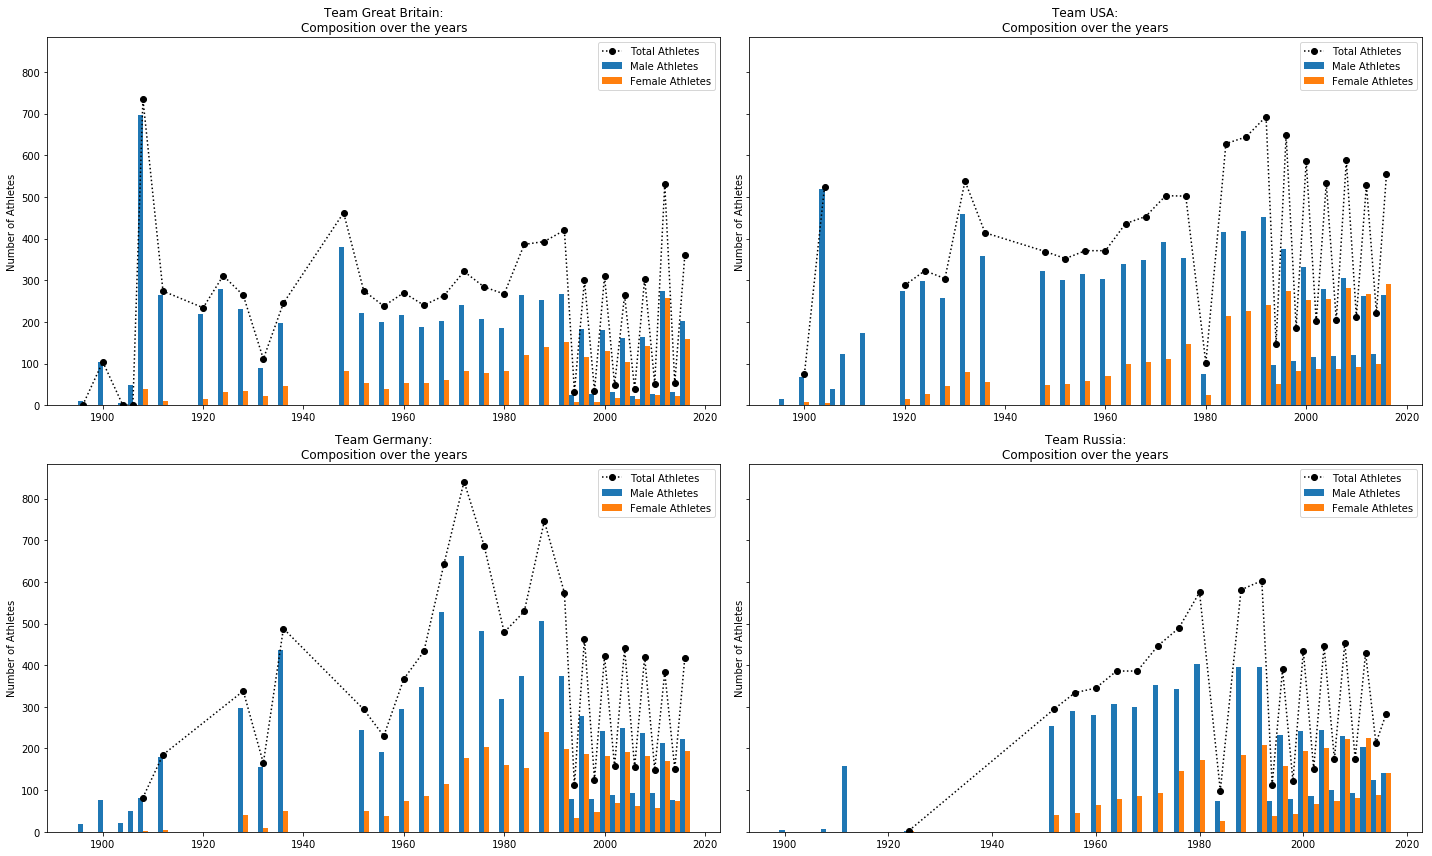

In [61]:
# Plot the values of male, female and total athletes using bar charts and the line charts.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12), sharey = True)
fig.subplots_adjust(hspace = 0.3)

# Plot team Australia's contingent size
ax1.bar(uk_data.index.values, uk_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax1.bar(uk_data.index.values, uk_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax1.plot(uk_data.index.values, uk_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax1.set_title('Team Great Britain:\nComposition over the years')
ax1.set_ylabel('Number of Athletes')
ax1.legend(loc = 'best')

# Plot team USA's contingent size
ax2.bar(usa_data.index.values, usa_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax2.bar(usa_data.index.values, usa_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax2.plot(usa_data.index.values, usa_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax2.set_title('Team USA:\nComposition over the years')
ax2.set_ylabel('Number of Athletes')
ax2.legend(loc = 'best')

# Plot team Germany's contingent size
ax3.bar(ger_data.index.values, ger_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax3.bar(ger_data.index.values, ger_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax3.plot(ger_data.index.values, ger_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes', 
         marker = 'o')
ax3.set_title('Team Germany:\nComposition over the years')
ax3.set_ylabel('Number of Athletes')
ax3.legend(loc = 'best')

# Plot team Russia's contingent size
ax4.bar(rus_data.index.values, rus_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax4.bar(rus_data.index.values, rus_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax4.plot(rus_data.index.values, rus_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax4.set_title('Team Russia:\nComposition over the years')
ax4.set_ylabel('Number of Athletes')
ax4.legend(loc = 'best')

plt.tight_layout()
plt.show()

The plots show variation in Gender wise participation from top medal winning countries in Olympics. Female participation in all countries has increased over the years but there is more inter country variations.